In [60]:
import numpy as np 
import pandas as pd
import requests
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import Holt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


In [59]:
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv', 
                 delimiter=',', index_col='Date')
df.index = pd.to_datetime(df.index)
df = df.asfreq(freq='D')
df['Temp'] = df['Temp'].interpolate()
df.head()
df.tail()
df.shape
df.isnull().sum()


,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


,Temp
Date,
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5
1990-12-30,15.7
1990-12-31,13.0


(3652, 1)

Temp    0
dtype: int64

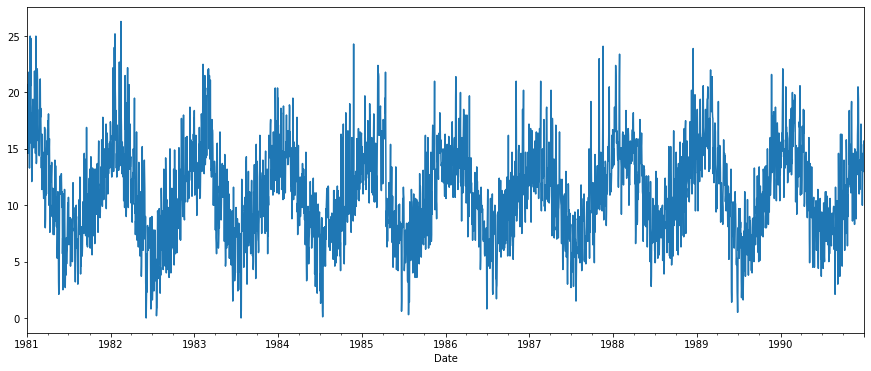

In [61]:
df['Temp'].plot(figsize=(15, 6));


In [62]:
alpha = 0.2
df['Temp_EWMA'] = df['Temp'].ewm(alpha=alpha, adjust=False).mean()


In [64]:
holt = Holt(df['Temp'], initialization_method='legacy-heuristic')


In [65]:
res = holt.fit()


In [66]:
df['Temp_Holt'] = res.fittedvalues


In [67]:
np.allclose(df['Temp_Holt'], res.fittedvalues)

True

<AxesSubplot:xlabel='Date'>

,Temp,Temp_EWMA,Temp_Holt
Date,,,
1981-01-01,20.7,20.70000,18.843096
1981-01-02,17.9,20.14000,19.657193
1981-01-03,18.8,19.87200,18.884142
1981-01-04,14.6,18.81760,18.845819
1981-01-05,15.8,18.21408,16.979877


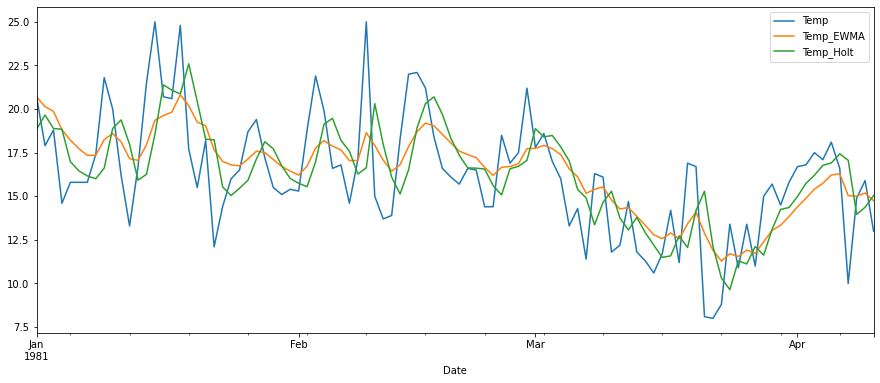

In [68]:
df.head(100).plot(figsize=(15, 6));
df.head(5)


### try train & test

In [69]:
N_test = 300
train = df.iloc[:-N_test, :]
test = df.iloc[-N_test:, :]


In [70]:
holt_train = Holt(
  train['Temp'], initialization_method='legacy-heuristic'  
)
res_train = holt_train.fit()


In [71]:
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]


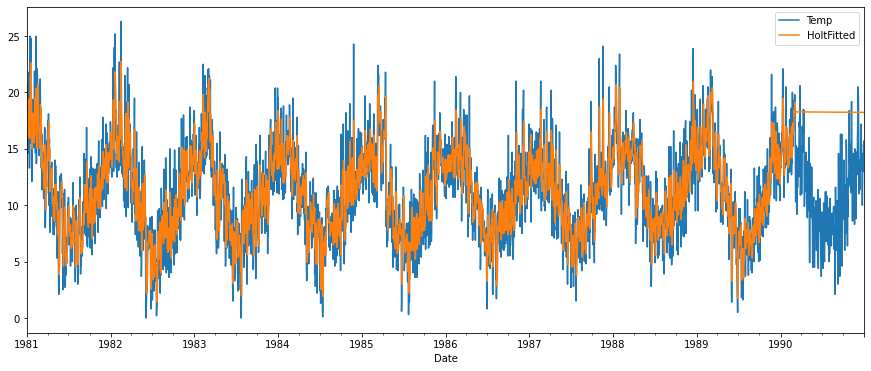

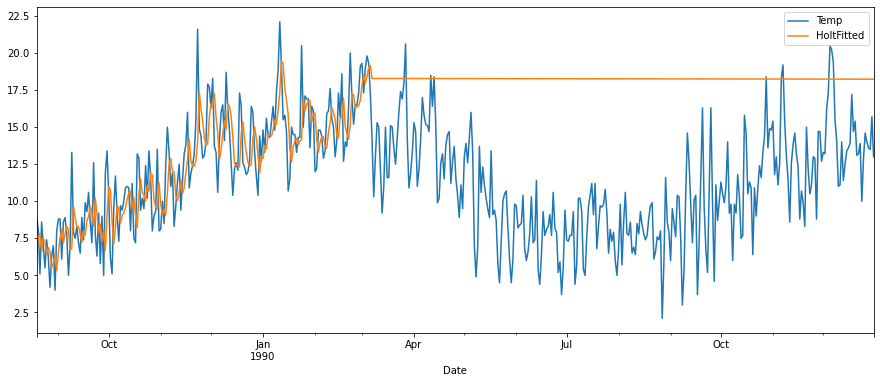

In [72]:
df.loc[train_idx, 'HoltFitted'] = res_train.fittedvalues
df.loc[test_idx, 'HoltFitted'] = res_train.forecast(N_test).values
df[['Temp', 'HoltFitted']].plot(figsize=(15, 6));
df[['Temp', 'HoltFitted']].tail(500).plot(figsize=(15, 6));

